# MMA/GMMA/MMAI 869: Individual Assignment

Version 1: Updated September 27, 2021

<font color='red'>\# TODO: fill in the below</font>

- [Thayan, Kasilingam]
- [20267721]
- [Section 2]
- [The Series of Unfortunate Events]
- [12/12/2022]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook. 

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal. 
- Please submit the PDF export of the Notebook. 
   - Please name the PDF file `2022_869_FirstnameLastName.pdf`
      - E.g., `2022_869_StephenThomas.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [ ]:
import datetime
import pandas as pd
import numpy as np

In [ ]:
print(datetime.datetime.now())

2021-12-12 15:46:33.998861


In [ ]:
!which python

/usr/local/bin/python


In [ ]:
!python --version

Python 3.7.12


In [ ]:
!echo $PYTHONPATH

/env/python


In [ ]:
# TODO: install any packages you need to here. For example:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples,calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import numpy as np
from sklearn.cluster import DBSCAN
from pandas import DataFrame
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
import seaborn as sns; sns.set()

# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst! Congratulations.

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their personal bank account). 

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.) 
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any prepropoceesing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data 

In [ ]:
# DO NOT MODIFY THIS CELL
df1a = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [ ]:
#To see how the data is structured
df1a.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [ ]:
#To check if there is any missing values
df1a.isnull().values.any()

False

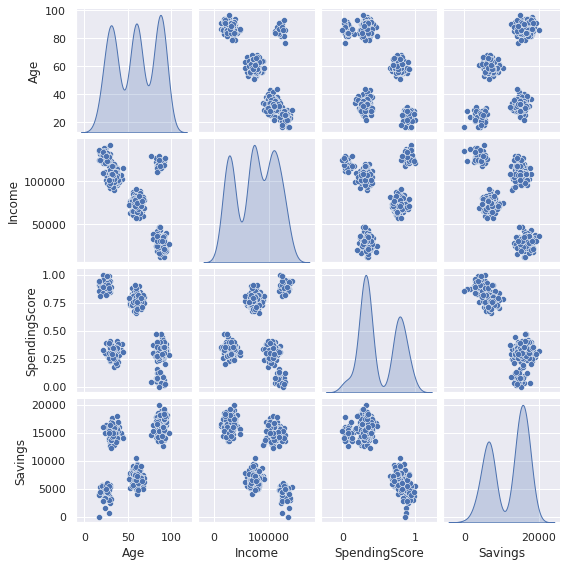

In [ ]:
#To visually see the data, please adjust the height if it is too small.
sns.pairplot(df1a,height=2,diag_kind="kde")

In [ ]:
#To standardize the data
scaler = StandardScaler()
features = ['Age','Income', 'SpendingScore','Savings']
df1a[features] = scaler.fit_transform(df1a[features])
df1a.describe()

,Age,Income,SpendingScore,Savings
count,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02
mean,5.672031e-17,-2.638154e-17,-1.954432e-16,-4.058360e-16
std,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00
min,-1.742394e+00,-1.766355e+00,-1.947295e+00,-2.399206e+00
25%,-1.037472e+00,-1.139805e+00,-7.722011e-01,-1.018085e+00
50%,-8.211094e-04,-1.210579e-02,-5.276784e-01,4.747819e-01
75%,1.077295e+00,8.784513e-01,1.014725e+00,8.463867e-01
max,1.574888e+00,1.849048e+00,1.908103e+00,1.645835e+00


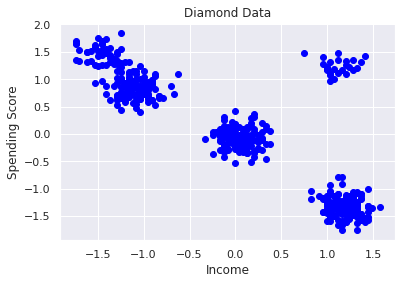

In [ ]:
plt.figure();

plt.scatter(df1a.iloc[:, 0], df1a.iloc[:, 1], c="blue");
plt.title("Diamond Data");
plt.xlabel('Income');
plt.ylabel('Spending Score');
plt.xticks();
plt.yticks();

## 1.1: Clustering Algorithm #1

In [ ]:
# First clustering algorithm we will use is KMeans
k_means = KMeans(n_clusters=4, random_state=40)
k_means.fit(df1a)

KMeans(n_clusters=4, random_state=40)

In [ ]:
k_means.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0,
       1, 2, 0, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 0, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 0, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 0, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 0, 1, 2, 1, 0, 2, 1,
       2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 0, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 0, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [ ]:
# Let's look at the centers
k_means.cluster_centers_

array([[-0.72276928,  0.89502598, -0.90658925,  0.62188649],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636]])

In [ ]:
# WCSS == Inertia
k_means.inertia_

189.70178796659565

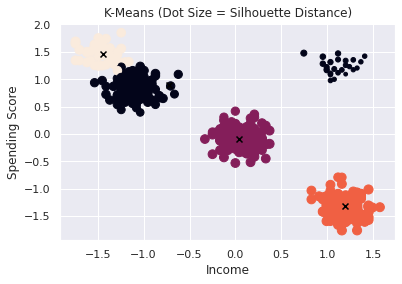

In [ ]:
sample_silhouette_values = silhouette_samples(df1a, k_means.labels_)
sizes = 100*sample_silhouette_values

plt.figure();

plt.scatter(df1a.iloc[:, 0], df1a.iloc[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)");
plt.xlabel('Income');
plt.ylabel('Spending Score');

In [ ]:
sample_silhouette_values = silhouette_samples(df1a, k_means.labels_)

X_tmp = df1a.copy()
X_tmp['Cluster ID'] = k_means.labels_

X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

,Age,Income,SpendingScore,Savings,Cluster ID,Silhouette
464,1.118762,-1.329586,-0.677416,1.065545,2,0.879878
272,1.326092,-1.365212,-0.715925,0.938250,2,0.880975
121,1.201694,-1.374445,-0.741044,1.060476,2,0.883030
379,1.243160,-1.397806,-0.706762,0.945914,2,0.885550
335,1.243160,-1.350862,-0.690416,0.949109,2,0.886526


In [ ]:
#To undo the impacts of scaling that was done above.
scaler.inverse_transform(k_means.cluster_centers_)

array([[4.15894040e+01, 1.07695980e+05, 2.69934734e-01, 1.49372658e+04],
       [5.99554140e+01, 7.24480637e+04, 7.71518368e-01, 6.88997219e+03],
       [8.77755102e+01, 2.78661020e+04, 3.28800461e-01, 1.66592614e+04],
       [2.41800000e+01, 1.28029120e+05, 8.96891640e-01, 4.08752031e+03]])

In [ ]:
# Let's look at some example rows in each.
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(df1a[k_means.labels_==label].head()))


Cluster 0:
[[8.50000000e+01 1.11389000e+05 3.67953622e-02 1.60092378e+04]
 [3.60000000e+01 9.97800000e+04 2.65432607e-01 1.63984013e+04]
 [3.00000000e+01 9.99490000e+04 3.44679224e-01 1.36216397e+04]
 [3.10000000e+01 1.07963000e+05 2.90508633e-01 1.34070814e+04]
 [9.20000000e+01 1.22879000e+05 6.07240352e-02 1.37096703e+04]]

Cluster 1:
[[5.80000000e+01 7.77690000e+04 7.91328777e-01 6.55982992e+03]
 [5.90000000e+01 8.17990000e+04 7.91082047e-01 5.41766143e+03]
 [6.20000000e+01 7.47510000e+04 7.02656952e-01 9.25899297e+03]
 [5.90000000e+01 7.43730000e+04 7.65679562e-01 7.34633450e+03]
 [5.40000000e+01 7.65000000e+04 7.85197850e-01 6.87888425e+03]]

Cluster 2:
[[8.70000000e+01 1.77600000e+04 3.48777548e-01 1.68695071e+04]
 [8.70000000e+01 4.25920000e+04 3.55289682e-01 1.80862872e+04]
 [8.30000000e+01 3.43840000e+04 3.24718682e-01 1.47833791e+04]
 [8.40000000e+01 2.76930000e+04 3.67062973e-01 1.78795589e+04]
 [8.70000000e+01 3.14810000e+04 3.17423971e-01 1.61806881e+04]]

Cluster 3:
[[2.

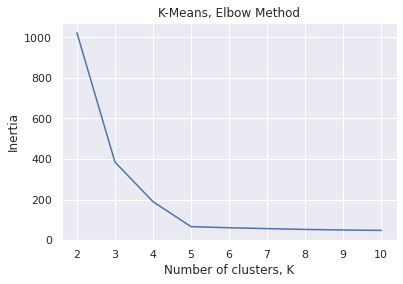

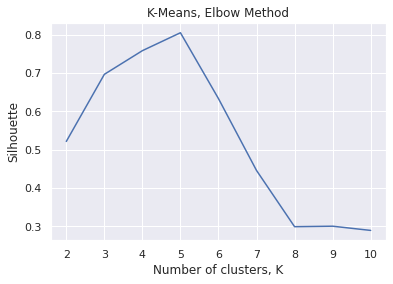

In [ ]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=40).fit(df1a)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(df1a, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");


plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

In [ ]:
#Based on the above elbow charts it seems that the optimal # of clusters is 5.
k_means = KMeans(n_clusters=5, random_state=40)
k_means.fit(df1a)
k_means.cluster_centers_

array([[-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [ ]:
#To check the silhouette score
silhouette_score(df1a, k_means.labels_)

0.8048976287755765

In [ ]:
#To check the calinski harabasz score
calinski_harabasz_score(df1a, k_means.labels_)

3671.358018517615

## 1.2: Clustering Algorithm #2

In [ ]:
# Second clustering algorithm we will use is DBSCAN
db = DBSCAN(eps=0.3, min_samples=3)
db.fit(df1a)

DBSCAN(eps=0.3, min_samples=3)

In [ ]:
db.labels_

array([ 0,  0,  0,  0,  1,  2,  0,  1,  1,  1,  3,  4,  4,  4,  0,  3,  0,
        1,  1,  3,  4,  3,  0,  1, -1,  2,  2,  0,  1,  0,  0,  0,  1,  0,
        4,  0,  1,  0,  4,  4,  0,  1,  2,  0,  0,  2,  3,  2,  4,  0,  1,
        4,  2,  1,  0,  1,  4,  1,  1,  1,  1,  1,  1,  0,  0,  0,  1,  2,
        2,  0,  0,  4,  1,  1,  4,  0,  4,  0,  0,  2,  0, -1,  0,  1,  1,
        4,  4,  0,  0,  0,  0,  0,  2,  1,  0,  2,  4,  0,  0,  4,  4,  2,
        4,  2,  4,  1, -1,  4,  4,  0,  1,  4,  0,  4,  4,  4,  0,  4,  2,
        1,  4,  1,  1,  1,  4,  3,  0,  1,  0,  0,  4,  0,  4,  0,  2,  1,
        3,  2,  0,  4,  1,  0,  0,  2,  0,  2,  0,  3,  0,  1,  0,  4,  1,
        0,  1,  3,  4,  0,  1,  0,  4,  1,  0,  4, -1,  4,  1,  0,  4,  0,
        1,  0,  4,  0,  1,  0,  0,  1,  1,  1,  0,  0,  4,  2,  2,  1,  4,
        0,  0,  0,  4,  1,  0,  0,  0,  1, -1,  4,  1,  1,  1,  4,  0,  4,
        0,  4,  0,  1,  2,  0,  1,  1,  1,  1,  0,  1,  4,  2,  4,  1,  0,
        0,  4,  1,  4,  2

In [ ]:
silhouette_score(df1a, db.labels_)

0.7679653694292776

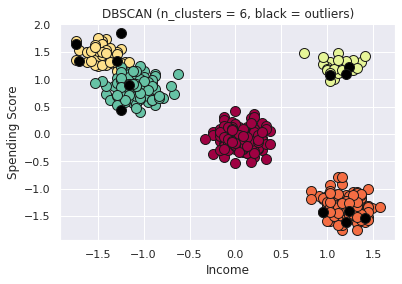

In [ ]:
plt.figure();

unique_labels = set(db.labels_)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

for k in unique_labels:
    if k == -1:        # Black used for noise.
        col = [0, 0, 0, 1]
    else:
        col = colors[k]

    xy = df1a[db.labels_ == k]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10);

    
plt.title('');
plt.title("DBSCAN (n_clusters = {:d}, black = outliers)".format(len(unique_labels)));
plt.xlabel('Income');
plt.ylabel('Spending Score');

eps=0.3, min_samples=2, n_clusters=5, sil=0.7679653694292776


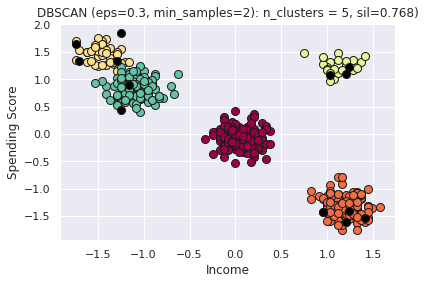

eps=0.1, min_samples=3, n_clusters=14, sil=-0.6313739076946371


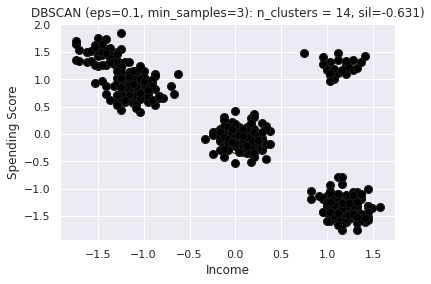

eps=0.3, min_samples=3, n_clusters=5, sil=0.7679653694292776


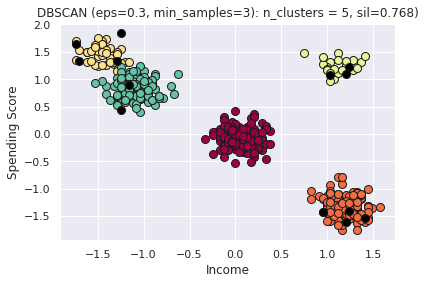

eps=0.6, min_samples=3, n_clusters=4, sil=0.8048976287755765


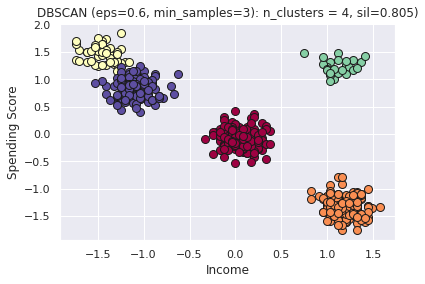

eps=0.6, min_samples=7, n_clusters=4, sil=0.8048976287755765


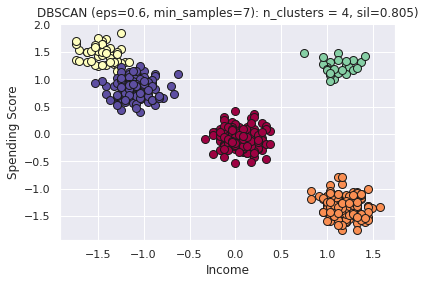

eps=0.36, min_samples=3, n_clusters=5, sil=0.7913054451716924


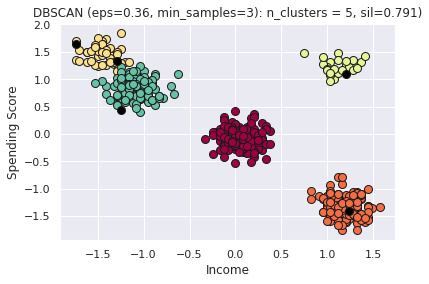

In [ ]:
def do_and_plot_dbscan(df1a, eps, min_samples):
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(df1a)

    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) - 1
    
    if n_clusters <= 1:
        #print('eps={}, min_samples={}, n_clusters <= 1. Returning.'.format(eps, min_samples))
        #return
        sil = -1
    else:
        sil = silhouette_score(df1a, db.labels_)
    
    print("eps={}, min_samples={}, n_clusters={}, sil={}".format(eps, min_samples, n_clusters, sil))
    
    plt.figure();
    
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))];

    for k in unique_labels:
        if k == -1:        # Black used for noise.
            col = [0, 0, 0, 1]
        else:
            col = colors[k]

        xy = df1a[db.labels_ == k]
        plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=8);


    plt.title('');
    plt.title("DBSCAN (eps={}, min_samples={}): n_clusters = {:d}, sil={:.3f})".format(eps, min_samples, n_clusters, sil));
    plt.xlabel('Income');
    plt.ylabel('Spending Score');
    #plt.savefig('out/simple_dbscan_{}_{}.png'.format(eps, min_samples))
    plt.show()


do_and_plot_dbscan(df1a, 0.3, 2)
do_and_plot_dbscan(df1a, 0.1, 3)
do_and_plot_dbscan(df1a, 0.3, 3)
do_and_plot_dbscan(df1a, 0.6, 3)
do_and_plot_dbscan(df1a, 0.6, 7)
do_and_plot_dbscan(df1a, 0.36, 3)

In [ ]:
#Based on the above charting it seems that an eps=0.6 and min_samples=7 will produce the best score
dbsc = DBSCAN(eps=0.6, min_samples=7)
dbsc.fit(df1a)

DBSCAN(eps=0.6, min_samples=7)

In [ ]:
#To check the silhouette score
silhouette_score(df1a, dbsc.labels_)

0.8048976287755765

In [ ]:
#To check the calinski harabasz score
calinski_harabasz_score(df1a, dbsc.labels_)

3671.358018517615

## 1.3 Model Comparison

*   Kmeans Model:
silhouette_score - 0.8048976287755765
calinski_harabasz_score - 3671.358018517615
*   BDSCAN Model:
silhouette_score - 0.8048976287755765
calinski_harabasz_score - 3671.358018517615

As you can see the results from both models were exactly the same, which is quite unusual. But this enables us to look at some non-quantiative metrics to determine which model Uncle Steve should utilize going forward. I would recommend that Uncle Steve go with the DBSCAN model for his usecase and for the following reasons:

The model works on the framework of density which means that it forms clusters based on dense data point regions which will help Uncle Steve better understand the types of customers that he has, as they will tend to cluster together.By focusing on data point density, DBSCAN does a good job in identifying outliers which would be useful for Uncle Steve. Since outliers are quite rare, it might not be something that Uncle Steve wants to remove when creating customer clusters. Inversily Uncle Steve can look at those outliers to see if they are high revenue/profit individuals and seek to understand how to get them to be repeat customers (or attract similar customers).

DBSCAN unlike KMeans doesnt seek to make clusters spherical which I think can be quite useful as mentioned above. We can also seek to understand why DBSCAN produces non-spherical clusters and see if there are insights that can be achieved.
Lastly what I liked about the DBScan is that the number of clusters doesn't need to specified which enables new potential viewpoints to enter, while the KMeans requires the number of clusters. This means that KMeans will operate faster and require less computing power since we are providing some domain insight, but sometimes that isn't always a good thing. Because the "expert" might have the wrong perspective on the domain insight which will just drive poor model performance.


## 1.4 Personas

TODO: Delete this text and insert your answer here.

*   Cluster #1: Low Income individuals with a high spend score are individuals that Uncle Steve should look to providing sales on credit, because these individuals like to spend but don't have a lot of money. By lowering their initial payment and monthly payments it will be easier to increase traffic on customers like this. Uncle Steve just needs to ensure that he has the correct credit checks in place. This seems to be one of the smaller portions of Uncle Steve's customer set.

*   Cluster #2 Moderately low income individuals with a moderately high spending score are individuals that Uncle Steve should look to improve profitability on. It seems to be one of the larger customer segments and Uncle Steve can look to see how he can try and upsell these customers(going to be hard) by again offering sales on credit. This will enable these individuals to spend above their means and help Uncle Steve grow his business.

*   Cluster #3 Average Income and average spend individuals also seems to be a big customer segment for Uncle Steve. These are the customers that Uncle Steve can continue to expand on by seeing what these individuals actually purchase and then driving repeat business through marketing efforts.

*   Cluster #4 These are high income earners who don't like to spend a lot. It will be very diffcult to extract further value from these indivuals as they don't seem to like to spend. With Uncle Steve owning a diamond store which is considered a luxury they might not be customers that are looking to come back too often. Promotions can be excuted to drive repeat business but is not encouraged as this will devalue Uncle Steve's business. 

*   Cluster #5 This is by far Uncle Steve's smallest customer base but might be one of his most profitable. These customers like to spend and have the money to spend it. It is highly encouraged that Uncle Steve provide a high quality relationship with these individuals so that they will be repeat customers for his business. They are customers that Uncle Steve can produce massive profits on as price probably isn't an issue with them.



# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out. 

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence. 

The rule {diapers} -> {baby food} would have high support, since both products are for infants and a high percentage of transactions would include both {diapers} & {baby food}. Uncle Steve would not find this interesting because he would have surely already noticed that so many transactions contain them together. 

## 2.2: A rule that might have reasonably high support but low confidence.


The rule {cheese} -> {crackers} would have high support since both products pairs well with each and a high percentage of transactions would include both {cheese} & {crackers}. However {crackers} are usually non-perishable while {cheese} isn’t and therefore the frequency of buying {cheese} is more than {crackers}, which results in a low confidence. Uncle Steve might find this interesting because he can help move {cheese} that is about to expire by bundling it with {crackers}.

## 2.3: A rule that might have low support and low confidence.

The rule {inflated balloons} -> {Spinach} would have low support since {inflated balloons} account for a very small percentage of transactions. This rule will have low confidence because {Spinach} is most likely a frequently bought item. Uncle Steve would probably not find this interesting because there is no way to generate additional sales from this insight. However, if Uncle Steve is actively working to get these two items to be sold together, he should probably redirect his resources to rules.

## 2.4: A rule that might have low support and high confidence.

The rule {Cake} -> {inflated balloons} would have low support since these products are rarely bought and would likely account for a small percentage of transactions. This rule does have a high confidence as they are usually bought together. Uncle Steve might find this interesting because he knows that the products have a high confidence, he just needs to now figure out how to increase support. He could do this by advertising that his store sells {Cake} & {inflated balloons}.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal componentns).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do? 


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow. 


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2021) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question. 
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [ ]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


In [ ]:
#To make sure there are no missing values
df3.isnull().values.any()

False

In [ ]:
#To see how data is structured. 
X_train.head()

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,236-22-6766,M,0,Jerry,Black,2,0,2,0466 Brown Wall,3-U8282,3329,0,12,New Roberttown,Household,1970-04-22
5628,766-20-5986,F,0,Julia,Jones,0,2,2,6095 Larson Causeway,LWO 912,2996,0,36,Ericmouth,Household,1964-06-19
1756,744-25-5747,F,0,Abigail,Estrada,2,0,3,293 Michael Divide,715 OQT,2470,0,24,East Jill,NewCar,1975-02-17
2346,463-78-3098,F,0,Jessica,Jones,2,1,2,02759 Williams Roads,869 SYK,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,414-44-6527,M,0,William,Shaffer,0,1,3,19797 Turner Rue,48-A601,3549,0,36,North Judithbury,Vacation,1976-07-27


In [ ]:
#To drop columns that won't be meaningful at this time.
X_train = X_train.drop(['UserID','FirstName','LastName','Street','LicensePlate'],axis=1)
X_test = X_test.drop(['UserID','FirstName','LastName','Street','LicensePlate',],axis=1)

In [ ]:
X_train.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,1970-04-22
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1964-06-19
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,1975-02-17
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,1976-07-27


In [ ]:
X_train.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,M,0,2,0,2,3329,0,12,New Roberttown,Household,1970-04-22
5628,F,0,0,2,2,2996,0,36,Ericmouth,Household,1964-06-19
1756,F,0,2,0,3,2470,0,24,East Jill,NewCar,1975-02-17
2346,F,0,2,1,2,3745,0,30,Lake Debra,UsedCar,1977-02-16
2996,M,0,0,1,3,3549,0,36,North Judithbury,Vacation,1976-07-27


In [ ]:
from sklearn import preprocessing
X_train = X_train.copy()
lbl = preprocessing.LabelEncoder()
X_train['Sex'] = lbl.fit_transform(X_train['Sex'].astype(str))
X_train['NumberPets'] = lbl.fit_transform(X_train['NumberPets'].astype(str))
X_train['PreviousAccounts'] = lbl.fit_transform(X_train['PreviousAccounts'].astype(str))
X_train['ResidenceDuration'] = lbl.fit_transform(X_train['ResidenceDuration'].astype(str))
X_train['City'] = lbl.fit_transform(X_train['City'].astype(str))
X_train['Purpose'] = lbl.fit_transform(X_train['Purpose'].astype(str))
X_train['DateOfBirth'] = lbl.fit_transform(X_train['DateOfBirth'].astype(str))

In [ ]:
from sklearn import preprocessing
X_test = X_test.copy()
lbl = preprocessing.LabelEncoder()
X_test['Sex'] = lbl.fit_transform(X_test['Sex'].astype(str))
X_test['NumberPets'] = lbl.fit_transform(X_test['NumberPets'].astype(str))
X_test['PreviousAccounts'] = lbl.fit_transform(X_test['PreviousAccounts'].astype(str))
X_test['ResidenceDuration'] = lbl.fit_transform(X_test['ResidenceDuration'].astype(str))
X_test['City'] = lbl.fit_transform(X_test['City'].astype(str))
X_test['Purpose'] = lbl.fit_transform(X_test['Purpose'].astype(str))
X_test['DateOfBirth'] = lbl.fit_transform(X_test['DateOfBirth'].astype(str))

In [ ]:
X_train.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
3897,1,0,2,0,2,3329,0,12,12,2,1071
5628,0,0,0,2,2,2996,0,36,3,2,213
1756,0,0,2,0,3,2470,0,24,2,3,2110
2346,0,0,2,1,2,3745,0,30,7,6,2501
2996,1,0,0,1,3,3549,0,36,13,7,2401


In [ ]:
X_test.head()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth
1782,0,0,1,1,3,3773,0,36,13,3,375
3917,0,0,0,0,3,3412,0,24,8,6,53
221,0,0,2,2,0,4146,0,24,19,3,386
2135,1,0,2,1,1,3608,1,30,1,6,48
5224,0,0,2,1,1,2947,1,24,13,3,869


## 3.1: Baseline model

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_train,y_train)

1.0

In [ ]:
#check the model score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_train, y_train, cv=5)
print("Mean cross-validation score: %.4f" % scores.mean())

Mean cross-validation score: 0.8333


## 3.2: Feature engineering

In [ ]:
#To convert Date of Birth to Age
X_train['Age'] = datetime.date.today().year -  pd.to_datetime(X_train['DateOfBirth']).dt.year
X_test['Age'] = datetime.date.today().year -  pd.to_datetime(X_test['DateOfBirth']).dt.year

In [ ]:
#To make sure there are no missing values
X_train.isnull().values.any()

False

In [ ]:
#To create a new column that determines how much their principle payments are.
X_train['Prcple Pymnt'] = X_train['Amount']/X_train['Duration']
X_test['Prcple Pymnt'] = X_test['Amount']/X_test['Duration']

In [ ]:
#To make sure there are no missing values
X_train.isnull().values.any()

False

In [ ]:
#To create a new column that determines how many of their accounts have defaulted
X_train['Acct Dflt'] = X_train['PreviousDefault']/X_train['PreviousAccounts']
X_test['Acct Dflt'] = X_test['PreviousDefault']/X_test['PreviousAccounts']

In [ ]:
#To make sure there are no missing values
X_train.isnull().values.any()

True

In [ ]:
X_train['Acct Dflt'] = X_train['Acct Dflt'].replace(np.nan, 0)
X_test['Acct Dflt'] = X_test['Acct Dflt'].replace(np.nan, 0)

In [ ]:
#To get rid of any errors we have
from numpy import inf
X_train[X_train == -inf] = 0
X_test[X_test == -inf] = 0
X_train[X_train == inf] = 0
X_test[X_test == inf] = 0

In [ ]:
X_train.describe()

,Sex,PreviousDefault,NumberPets,PreviousAccounts,ResidenceDuration,Amount,Married,Duration,City,Purpose,DateOfBirth,Prcple Pymnt,Acct Dflt
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.00000
mean,0.304583,0.020208,1.020833,1.005208,1.990833,3595.628958,0.505417,24.278750,9.259792,4.029375,1777.444792,194.169281,0.01125
std,0.460279,0.140727,0.816826,1.010145,1.397882,425.243527,0.500023,9.391122,5.478843,1.749876,975.769253,139.939571,0.09955
min,0.000000,0.000000,0.000000,0.000000,0.000000,2158.000000,0.000000,6.000000,0.000000,0.000000,0.000000,64.416667,0.00000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,3291.750000,0.000000,18.000000,3.000000,3.000000,966.750000,111.691667,0.00000
50%,0.000000,0.000000,1.000000,1.000000,2.000000,3602.000000,1.000000,24.000000,12.000000,4.000000,1781.500000,140.408333,0.00000
75%,1.000000,0.000000,2.000000,2.000000,3.000000,3904.000000,1.000000,30.000000,13.000000,6.000000,2573.250000,206.930556,0.00000
max,1.000000,1.000000,2.000000,6.000000,9.000000,4982.000000,1.000000,36.000000,19.000000,7.000000,3569.000000,781.333333,1.00000


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dt.score(X_train,y_train)

1.0

In [ ]:
#check the model score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_train, y_train, cv=5)
print("Mean cross-validation score: %.4f" % scores.mean())

Mean cross-validation score: 0.8365


## 3.3: Feature selection

In [ ]:
from sklearn.feature_selection import RFECV, RFE

clf = DecisionTreeClassifier(random_state=0)
sel = RFE(estimator=clf, n_features_to_select=6)
sel = sel.fit(X_train, y_train)

X_train_new = sel.transform(X_train)
X_test_new = sel.transform(X_test)

In [ ]:
#check the model score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt, X_train_new, y_train, cv=5)
print("Mean cross-validation score: %.4f" % scores.mean())

Mean cross-validation score: 0.8408


## 3.4: Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

clf = DecisionTreeClassifier(random_state=42)

params = {'criterion': ('gini', 'entropy'), 
          'splitter': ('best', 'random'), 
          'class_weight': ('balanced', None), 
          'max_depth': [2, 5, 10, 20], 
          'min_samples_leaf': [1, 5, 10],
          'max_features':[0.25, 0.5, 0.75, 1.0]}

search = GridSearchCV(clf, params, scoring='f1_macro', cv=10, verbose=1)
search = search.fit(X_train_new, y_train)

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report
y_pred = search.predict(X_test_new)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90       991
           1       0.00      0.00      0.00       209

    accuracy                           0.83      1200
   macro avg       0.41      0.50      0.45      1200
weighted avg       0.68      0.83      0.75      1200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
search.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 2,
 'max_features': 0.75,
 'min_samples_leaf': 1,
 'splitter': 'best'}

In [ ]:
search.best_score_

0.7848635531983021

In [ ]:
# Helper function to print out the results of hyperparmater tuning in a nice table.

def cv_results_to_df(cv_results):
    results = pd.DataFrame(list(cv_results['params']))
    #results['mean_fit_time'] = cv_results['mean_fit_time']
    #results['mean_score_time'] = cv_results['mean_score_time']
    #results['mean_train_score'] = cv_results['mean_train_score']
    #results['std_train_score'] = cv_results['std_train_score']
    results['mean_val_score'] = cv_results['mean_test_score']
    #results['std_val_score'] = cv_results['std_test_score']
    results['rank_val_score'] = cv_results['rank_test_score']

    results = results.sort_values(['mean_val_score'], ascending=False)
    return results

In [ ]:
cv_results_to_df(search.cv_results_)

,class_weight,criterion,max_depth,max_features,min_samples_leaf,splitter,mean_val_score,rank_val_score
300,None,entropy,2,0.75,1,best,0.784864,1
302,None,entropy,2,0.75,5,best,0.784864,1
304,None,entropy,2,0.75,10,best,0.784864,1
306,None,entropy,2,1.00,1,best,0.784864,1
310,None,entropy,2,1.00,10,best,0.784864,1
...,...,...,...,...,...,...,...,...
293,None,entropy,2,0.25,10,random,0.453054,379
193,None,gini,2,0.25,1,random,0.453054,379
197,None,gini,2,0.25,10,random,0.453054,379
291,None,entropy,2,0.25,5,random,0.453054,379


In [ ]:
search.best_score_

0.7848635531983021

In [ ]:
model = search.best_estimator_

In [ ]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features=0.75,
                       random_state=42)

In [ ]:
final_pred = search.predict(X_test_new)

In [ ]:
scores = cross_val_score(search, X_test_new, y_test, cv=5)
print("Mean cross-validation score: %.4f" % scores.mean())

Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Fitting 10 folds for each of 384 candidates, totalling 3840 fits
Mean cross-validation score: 0.7888


## 3.5: Performance estimation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
kfold = KFold(n_splits=10)
results = cross_val_score(clf, X_test_new, y_test, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 84.75% (1.29%)


# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000. 

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations. 

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing. 
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



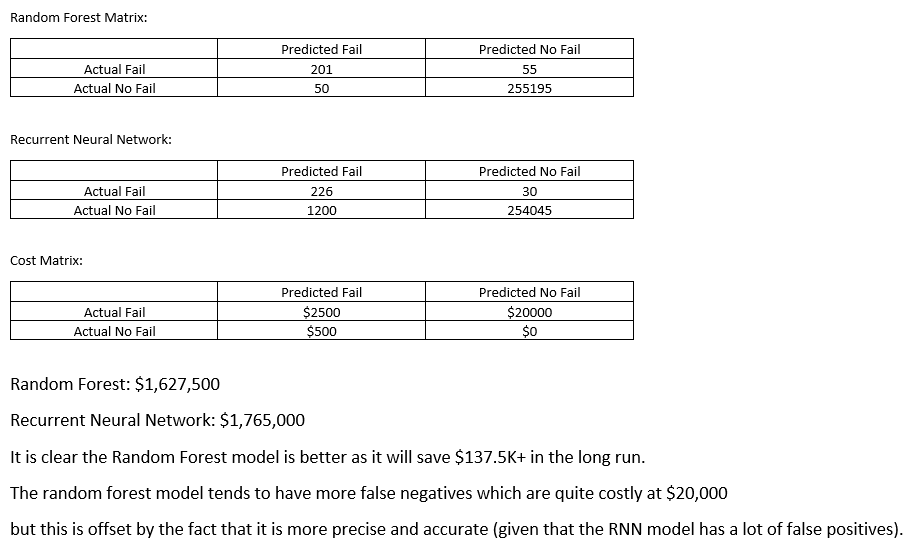
